<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>Treball de Final de Màster </b></p>
<p style="margin: 0; text-align:right;"><b>ANÀLISI DEL DIA MUNDIAL DE LES MALALTIES MINORITÀRIES (Font de dades: TWITTER)</b>.</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 3: Disseny i Implementació del TFM.

# CLUSTERING: Sense millores al dataset inicial.
<p style="color:#0000FF">
En aquest Jupyter Notebook, veurem com aplicar els diferents algorismes de clustering.
</p>

<div style="text-align:right">
    <span style="font-family:calibri;font-size:8;color:white; background-color:Crimson; text-align:right; margin-left: 0.5cm;padding:0.3cm"> Autor: </span>
    <span style="font-family:calibri;font-size:8;color:white; background-color:RoyalBlue; text-align:center;  margin-right: 0.5cm; padding:0.3cm"><b> Joaquim de Dalmases Juanet </b></span>
</div>

In [2]:
#llibreria numpy per usar la funció min().
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# Accés a la funció KMeans del mòdul cluster de la llibreria Skicit-learn.
from sklearn.cluster import KMeans, DBSCAN
# Visualització gràfica de matplotlib per Python.
import matplotlib.pyplot as plt
# Per el càlcul de durada dels processos.
import time
import delayedsparse
import scipy.sparse
from sklearn.decomposition import PCA

In [8]:
def test_colze(X,llista_k):
    tamFont=14
    c1='b'
    c2='limegreen'
    errorsMitjana=[]
    print("Testejant valors de k en {}\n".format(llista_k))
    time_start0=time.time()
    for k in llista_k:
        time_start=time.time()
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(X)
        temps=(time.time()-time_start)/60
        print("#Per K=:",k,"\n Durada: ",int(temps) if temps>0 else 0,"minut/s ", \
              int((temps-int(temps))*60),"segons.")
        # Càlcul SSE:
        #errorsMitjana.append(sum(np.min(cdist(X,kmeans.cluster_centers_,"euclidean"), axis=1))/X.shape[0])
        # També tenim el paràmetre de sortida 'inertia_' de KMeans calculat.
        # i podriem usar-lo:   
        errorsMitjana.append(np.sqrt(kmeans.inertia_)/X.shape[0])
    plt.xlabel("k",fontsize=tamFont,color=c1)
    plt.ylabel("SSE",fontsize=tamFont,color=c1)
    plt.title("Mètode del colze (Selecció de k)",fontsize=tamFont+1,color=c1)
    plt.plot(llista_k,errorsMitjana,"bo-",color=c2)
    
    temps=(time.time()-time_start0)/60
    print("\n Durada Final: ",int(temps) if temps>0 else 0,"minut/s ", \
          int((temps-int(temps))*60),"segons.")
    return errorsMitjana

In [7]:
# Lectura del dataset generat per modelitzar
df=pd.read_excel("DMMM_dataset_Final.xlsx")
# Llegim els tuits depurats. I generem una llista
# de documents amb el text de cada tuit.
tuits = list(df.text_net)

In [4]:
# Apliquem Feature enginering: tdf-idf. Obtenim un vocabulari i un conteig de paraules
# i una matriu amb files tuits, columnes paraules. Ara cada element de la matriu conté el valor de
# significació o importancia d'aquesta paraula en el tuit i respecte la resta de tuits.
tfidf_vect = TfidfVectorizer()
matriu_tfidf = tfidf_vect.fit_transform(tuits)

In [5]:
index_list=[]
for row in df.iterrows():
    index_list.append(pd.to_datetime(row[1]['created_at'], format='%a %b %d %H:%M:%S +0000 %Y'))
df.index = index_list

In [9]:
tuits=df[['_id','text_net','user_idstr']]
tuits.columns=['_id','text','autor']
df=[]

# CLUSTERING

## KMeans

### Cerquem un nombre de clusters òptim aplicant la regla del colze
<p style="color:#0000FF">
    Apliquem la prova executant l'algorisme KMeans, avaluant cada valor de <b>k</b> amb la mètrica <b>SSE</b> (la suma de tots els errors (distància de cada punt al seu centroide assignat) al quadrat).<br>
    Aquest procediment, realitzat per a cada possible valor <b>k</b>, resulta en una funció monòtona decreixent, on l'eix <b>x</b> representa els diferents valors de <b>k</b>, i l'eix <b>y</b> el <b>SSE</b>. Intuïtivament es podrà observar un significatiu descens de l'error, que indicarà el valor idoni de <b>k</b>.
</p>

Testejant valors de k en [2,21]

#Per K=: 2 
 Durada:  2 minut/s  43 segons.
#Per K=: 3 
 Durada:  3 minut/s  39 segons.
#Per K=: 4 
 Durada:  3 minut/s  58 segons.
#Per K=: 5 
 Durada:  4 minut/s  19 segons.
#Per K=: 6 
 Durada:  4 minut/s  9 segons.
#Per K=: 7 
 Durada:  4 minut/s  29 segons.
#Per K=: 8 
 Durada:  4 minut/s  22 segons.
#Per K=: 9 
 Durada:  3 minut/s  31 segons.
#Per K=: 10 
 Durada:  4 minut/s  22 segons.
#Per K=: 11 
 Durada:  4 minut/s  4 segons.
#Per K=: 12 
 Durada:  2 minut/s  53 segons.
#Per K=: 13 
 Durada:  4 minut/s  41 segons.
#Per K=: 14 
 Durada:  4 minut/s  53 segons.
#Per K=: 15 
 Durada:  4 minut/s  43 segons.
#Per K=: 16 
 Durada:  4 minut/s  3 segons.
#Per K=: 17 
 Durada:  4 minut/s  9 segons.
#Per K=: 18 
 Durada:  4 minut/s  46 segons.
#Per K=: 19 
 Durada:  4 minut/s  0 segons.
#Per K=: 20 
 Durada:  4 minut/s  54 segons.

 Durada Final:  78 minut/s  47 segons.


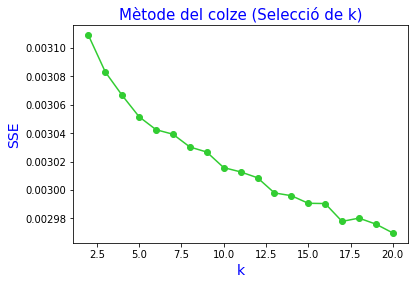

In [7]:
errorsMitjana = test_colze(matriu_tfidf,2,21)

### Observacions
<p style="color:#0000FF">
No obtenim un k òptim. Això implica que els clusters no tenen formes ideals, ni separades.<br>
Visualitzm el histograma per veure com estan distribuits els tuits en els clusters.<br>
Tal com ja sabem, el procés de captura de dades ja ens mostrava una captura de tuits concentrada en
el dia 29/02 i per tant si els comentaris dels tuits són respecte aquest dia aquest cluster pot ser
    de magnitud major que la resta.
</p>
<p style="color:#0000FF">
    Escollim un valor raonable per el nombre de clusters (k=9) i executem l'algosrisme:
</p>

In [11]:
# Utilitzem aquesta matriu per aplicar kmeans
num_clusters = 9
km_model = KMeans(num_clusters)
time_start = time.time()
km_model.fit(matriu_tfidf)
temps=(time.time()-time_start)/60
print("#Tuits processats:",matriu_tfidf.shape[0],"\n Durada: ",int(temps) if temps>0 else 0,"minut/s ", \
      int((temps-int(temps))*60),"segons.")


#Tuits processats: 98433 
 Durada:  3 minut/s  58 segons.


In [14]:
#tuits_km = pd.DataFrame({'tuits':tuits,'Cluster':km_model.labels_})
tuits['cluster']=km_model.labels_

<p style="color:#0000FF">
Per saber com es distribueixen els tuits en cada cluster, i visualitzar la seva magnitud calculem l'<b>histograma</b>.
</p>

Text(0.5, 1.0, 'Distribució de tuits per cluster')

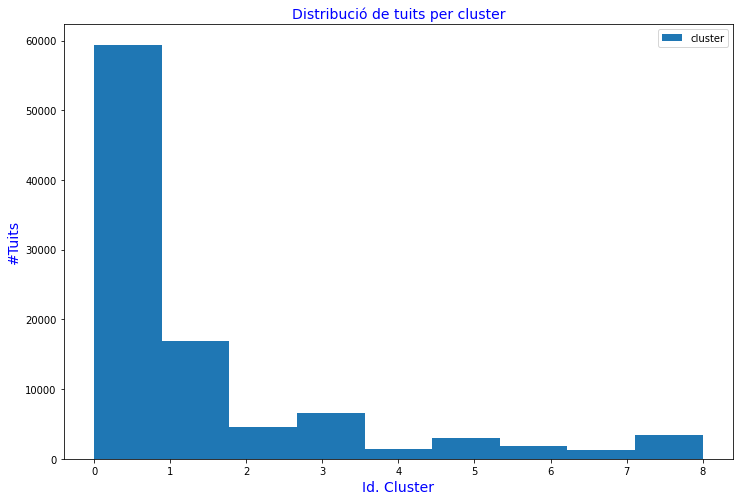

In [17]:
# Visualitzem l'histograma
tuits['cluster'].plot.hist(tuits['cluster'], bins=num_clusters,legend=True, figsize=(12,8), rwidth=1, align='mid')
plt.xlabel("Id. Cluster",fontsize=14,color='b')
plt.ylabel("#Tuits",fontsize=14,color='b')
plt.title("Distribució de tuits per cluster",fontsize=14,color='b')

<p style="color:#0000FF">
    La majoria de tuits se'ns concentren en un sol clúster.
</p>

### Representem la distribució que tenim aplicant PCA i representant en 2D
<p style="color:#0000FF">
    Partim de la matriu de coeficients <b>tf-idf</b> que estan normalitzats i calculem una reducció a 2 dimensions, que podem representar.<br>
    Per poder aplicar PCA sobre una matriu 'sparse', utilitzem la llibreria <b>delayedsparse</b>, i reduïm a dos dimensions i visualitzem els clústers obtinguts.
</p>

In [18]:
# Apliquem reducció de dimensionalitat
# per millorar els resultats del clustering.

time_start = time.time()
X = matriu_tfidf
# reducció de la dimensionalitat amb PCA:
#pca = PCA(n_components=2)
n_comp=2
print("\nCreant el model i matriu PCA - Nº Components=",n_comp)
pca=delayedsparse.PCA(n_components=n_comp)
X_r_PCA = pca.fit(X).transform(X)
print("Dimensions de les dades reduïdes amb PCA:", np.shape(X_r_PCA))

temps=(time.time()-time_start)/60
print("#Reducció de dimensionalitat (PCA):",np.shape(X_r_PCA),"\n Durada: ",int(temps) if temps>0 else 0,"minut/s ", \
      int((temps-int(temps))*60),"segons.")



Creant el model i matriu PCA - Nº Components= 2
Dimensions de les dades reduïdes amb PCA: (98433, 2)
#Reducció de dimensionalitat (PCA): (98433, 2) 
 Durada:  0 minut/s  0 segons.


<p style="color:#0000FF">
Apliquem KMeans amb dimensionalitat 2, i visualitzem els clusters.
</p>

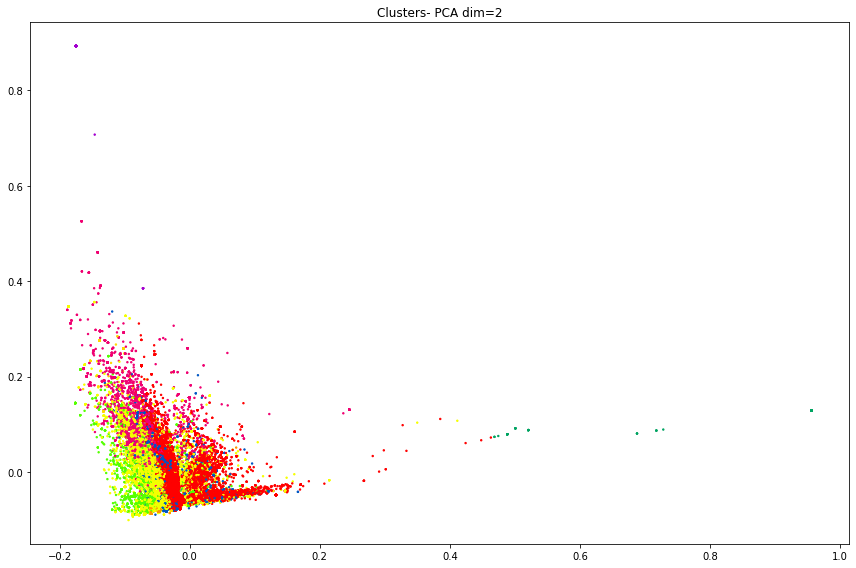

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
#kmeans = KMeans(n_clusters=8)
#dists = kmeans.fit_transform(X_r_PCA)
ax.scatter(np.array(X_r_PCA[:,0]), np.array(X_r_PCA[:,1]), c=km_model.labels_, s=2, cmap='prism')
ax.set_title('Clusters- PCA dim={}'.format(n_comp))
plt.tight_layout()

## DBSCAN

In [ ]:
# Entrenem el model DBSCAN amb les dades Normalitzades         
time_start = time.time()
Xz=matriu_tfidf
eps=2;  min_spl=4;
db = DBSCAN(eps=eps, min_samples=min_spl).fit(Xz)
temps=(time.time()-time_start)/60
print("\nDBSCAN:",np.shape(matriu_tfidf),"\n Durada: ",int(temps) if temps>0 else 0,"minut/s ", \
      int((temps-int(temps))*60),"segons.")

In [51]:
max(set(db.labels_))

5017

In [ ]:
# Definim el layout de visualització
fig, ax = plt.subplots(1,1,figsize=(10,8))
# Visualitzem la gràfica de punts amb la funció scatter
ax.scatter(Xz[db.labels_==-1, 0], Xz[db.labels_==-1, 1], marker='o', s=15, c='black')
# Definim el títol de la gràfica
ax.set_title("Resultat DBScan: eps="+str(np.round(eps,2))+" min_samples="+str(min_spl),fontsize=12)
# Visualitzem el clustering realitzat per l'algorisme DBSCAN
ax.scatter(Xz[db.labels_==0, 0], Xz[db.labels_==0, 1], marker='.', s=10, c='orange')
ax.scatter(Xz[db.labels_>0, 0], Xz[db.labels_>0, 1], marker='.', s=10, c='dodgerblue')
plt.show()